<a href="https://colab.research.google.com/github/TiGaI/HousingPriceKaggleProject3/blob/xiangwei/ames_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
### import necessary packages
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

**Jupyterhub sux**


---



In [7]:
### load training and test data
train = pd.read_csv('https://raw.githubusercontent.com/TiGaI/HousingPriceKaggleProject3/master/data/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/TiGaI/HousingPriceKaggleProject3/master/data/test.csv')

### view train dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d5f2913c8>,
      dtype=object)

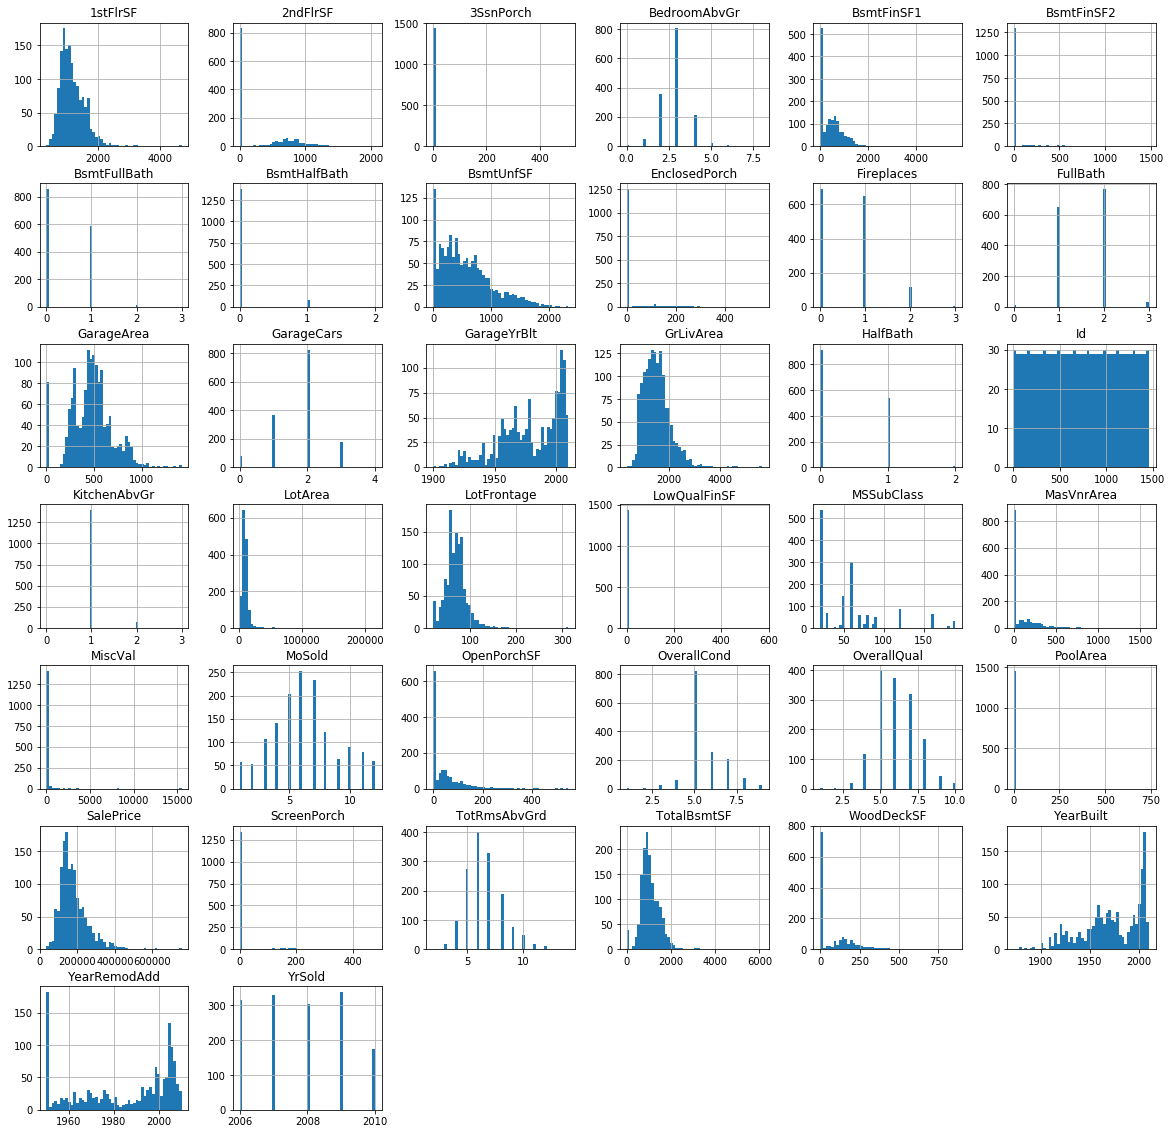

In [10]:
### Check the distribution of all the numeric variables
train.hist(bins=50, figsize=(20,20))

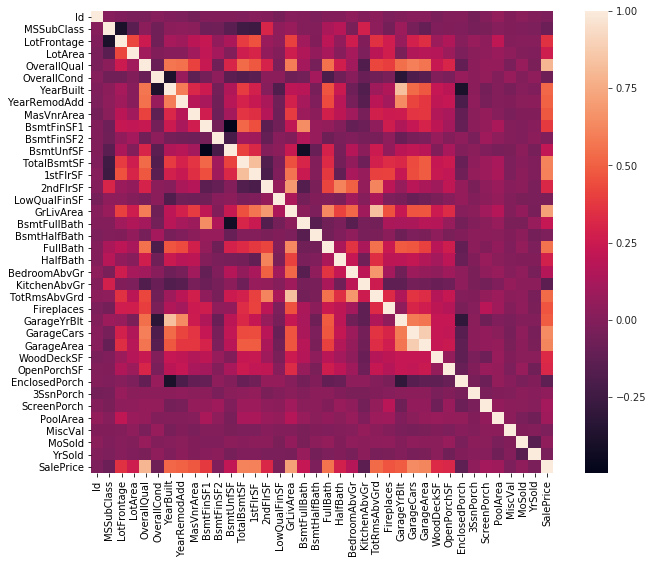

In [0]:
#### look at the correlation heatmap
fig, ax = plt.subplots(figsize=(11.5,8.5))
sns.set_style("white")
sns.heatmap(train.corr(),square=True)

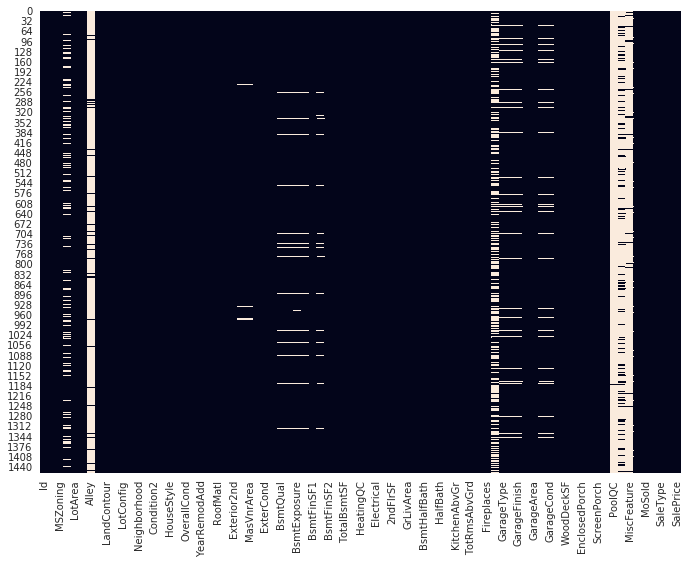

In [0]:
#### missing values
fig, ax = plt.subplots(figsize=(11.5,8.5))
sns.set_style("white")
sns.heatmap(train.isnull(), cbar=False)

In [9]:
#### study the missing values
train_missing = train.isna()
train_num_missing = train_missing.sum().to_frame()
#train_num_missing.sort_values(ascending = False)
train_num_missing['Percentage'] = train_num_missing[0]/1460
train_num_missing.columns = ['Missing Value', 'Percentage']
train_num_missing = train_num_missing.sort_values('Percentage', ascending = False)
train_num_missing[train_num_missing['Missing Value'] > 0]  ### 19


,Missing Value,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [0]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [0]:
numTrain.corr()['PoolArea'].sort_values(ascending=False)

PoolArea         1.000000
LotFrontage      0.206167
GrLivArea        0.170205
BsmtFinSF1       0.140491
1stFlrSF         0.131525
TotalBsmtSF      0.126053
Fireplaces       0.095074
SalePrice        0.092404
TotRmsAbvGrd     0.083757
2ndFlrSF         0.081487
LotArea          0.077672
WoodDeckSF       0.073378
BedroomAbvGr     0.070703
BsmtFullBath     0.067616
OverallQual      0.065166
LowQualFinSF     0.062157
GarageArea       0.061047
OpenPorchSF      0.060762
EnclosedPorch    0.054203
ScreenPorch      0.051307
FullBath         0.049604
BsmtFinSF2       0.041709
MiscVal          0.029669
HalfBath         0.022381
GarageCars       0.020934
BsmtHalfBath     0.020025
MasVnrArea       0.011723
MSSubClass       0.008283
YearRemodAdd     0.005829
YearBuilt        0.004950
OverallCond     -0.001985
3SsnPorch       -0.007992
GarageYrBlt     -0.014501
KitchenAbvGr    -0.014525
MoSold          -0.033737
BsmtUnfSF       -0.035092
YrSold          -0.059689
Name: PoolArea, dtype: float64

In [11]:
#split numerical and catergorical values
numTrain = train.loc[:, train.dtypes != 'object'].drop('Id', axis=1)
catTrain = train.loc[:, train.dtypes == 'object']
print(numTrain.columns)
print(catTrain.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'Heatin

In [0]:
### Treating the missing values
## 'LotFrontage', 'MasVnrArea', 'PoolArea'
#num columns we filling in missing value with zero
numTrain['LotFrontage'].fillna(0, inplace=True)  ## fill in the NAs of LotFrontage with 0
numTrain['MasVnrArea'].fillna(0, inplace=True)  ## fill in the NAs of MasVnrArea with 0
numTrain['Pool'] = numTrain['PoolArea'].apply(lambda x: 1 if x > 0 else 0)  ## create a new variable indicating whether the house has a pool or not

## 'MasVnrType', 'PoolQC', 'GarageCond'
#cat columns
catTrain['MasVnrType'].fillna("None", inplace=True)  ## fill in the NAs of MasVnrType with None
catTrain['PoolQC'].fillna("None",inplace=True)  ## fill in the NAs of PoolQC with None

## Hash 'PoolQC'
PoolReplacement = {
   'PoolQC': {
      'None':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
   }
}

# replace the PoolQC
catTrain.replace(PoolReplacement, inplace=True)

## Hash 'GarageQual', 'GarageCond', 'GarageFinish'
garabgeReplacement = {
   'GarageQual': {
      np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
   },
    'GarageCond': {
      np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
   },
    'GarageFinish': {
      np.nan:0, 'Unf': 1, 'RFn': 2, 'Fin': 3
   }
}

# replace 'GarageQual', 'GarageCond', 'GarageFinish'
catTrain = catTrain.replace(garabgeReplacement, inplace=False)

# create 'GarageQuality' that takes the average of 'GarageQual' and 'GarageCond'
catTrain["GarageQuality"] = (catTrain["GarageQual"] + catTrain["GarageCond"])/2

# fill in the NAs of GarageYrBlt with YearBuilt
numTrain['GarageYrBlt'].fillna(numTrain['YearBuilt'], inplace=True)

# fill in the NAs of 'GarageType' with 'None'
catTrain['GarageType'].fillna("None", inplace=True)

## Hash 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual'
BsmtReplacement = {
   'BsmtFinType1': {
      np.nan:0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6
   },
    'BsmtFinType2': {
      np.nan:0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6
   },
    'BsmtExposure': {
        np.nan:0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4
    },
    'BsmtCond': {
        np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
    },
    'BsmtQual': {
        np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
    },
}

# replace 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual'
catTrain = catTrain.replace(BsmtReplacement)

# convert the type of 'BsmtCond' to int64
catTrain["BsmtCond"] = catTrain1["BsmtCond"].astype(np.int64)

## Hash FireplaceQu
FirePlaceReplacement ={
    'FireplaceQu': {
        np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
    }
}

# replace 'FireplaceQu'
catTrain = catTrain.replace(FirePlaceReplacement)


## Fill the NAs of 'Electrical' with 'SBrkr'
catTrain['Electrical'].fillna('SBrkr', inplace=True)

## Fill the NAs of 'Fence' with 'None'
train['Fence'].fillna('None', inplace=True)

## Alley? Drop Alley?
train.drop(['B', 'C'], axis=1)


In [0]:
garabgeReplacement = {
   'GarageQual': {
      np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
   },
    'GarageCond': {
      np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
   },
    'GarageFinish': {
      np.nan:0, 'Unf': 1, 'RFn': 2, 'Fin': 3
   }
}

BsmtReplacement = {
   'BsmtFinType1': {
      np.nan:0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6
   },
    'BsmtFinType2': {
      np.nan:0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6
   },
    'BsmtExposure': {
        np.nan:0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4
    },
    'BsmtCond': {
        np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
    },
    'BsmtQual': {
        np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
    },
}

catTrain["BsmtCond"] = catTrain1["BsmtCond"].astype(np.int64)

FirePlaceReplacement ={
    'FireplaceQu': {
        np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
    }
}



catTrain["Aver_GarageQual"] = (catTrain["GarageQual"] + catTrain["GarageCond"])/2
catTrain = catTrain.replace(BsmtReplacement)
numTrain['GarageYrBlt'].fillna(numTrain['YearBuilt'], inplace=True)
catTrain['GarageType'].fillna("None", inplace=True)
catTrain["BsmtCond"] = catTrain1["BsmtCond"].astype(np.int64)

catTrain['Electrical'].fillna('SBrkr', inplace=True)


print(numTrain['SalePrice'].corr(catTrain1["BsmtFinType1"])) # 0.3049 Main Basement <- Xiangwei
print(numTrain['SalePrice'].corr(catTrain1["BsmtFinType2"])) #-0.005 no correlation - drop later

### convert the BsmtCond 

print(numTrain['SalePrice'].corr(catTrain1["BsmtCond"])) #0.2126071564855789

print(numTrain['SalePrice'].corr(catTrain1["BsmtQual"]))
print(numTrain['SalePrice'].corr(catTrain1["BsmtCond"]))
print(catTrain1["BsmtCond"].corr(catTrain1["BsmtQual"]))

In [19]:
train.groupby(['Neighborhood']).mean()['SalePrice'].sort_values(ascending = False)

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64

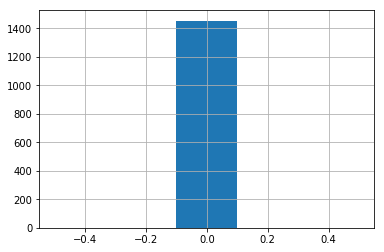

In [0]:
numTrain[numTrain['PoolArea'] < 0.1]['PoolArea'].hist(bin=5)

TypeError: ignored

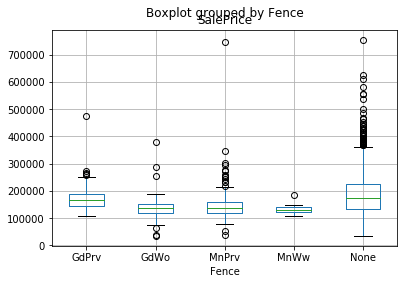

In [0]:
#fig, ax = plt.subplots(figsize=(11.5,8.5))
# numTrain['SalePrice'].boxplot(by=catTrain['Fence'])
train['Fence'].fillna('None', inplace=True)
train.boxplot(column = 'SalePrice',by='Fence')

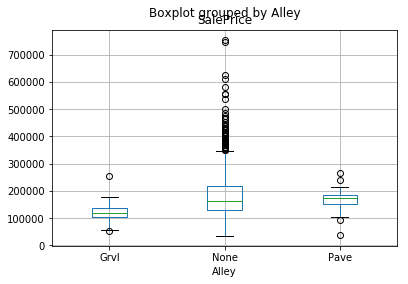

In [0]:
train['Alley'].replace('None', np.nan)
train.boxplot(column = 'SalePrice',by='Alley')

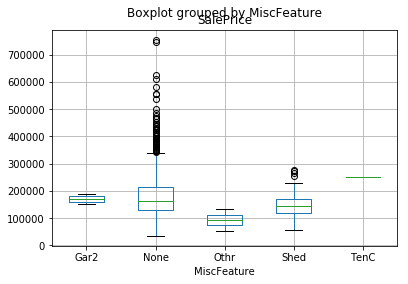

In [0]:
train['MiscFeature'].fillna('None', inplace=True)
train.boxplot(column = 'SalePrice',by='MiscFeature')

AttributeError: ignored

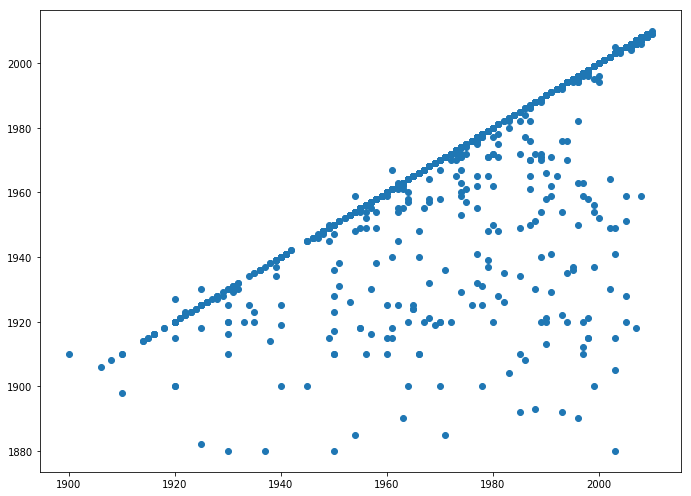

In [0]:
fig, ax = plt.subplots(figsize=(11.5,8.5))
plt.scatter(x=numTrain['GarageYrBlt'], y=numTrain['YearBuilt'])
#plt.set_label()

In [0]:
#numTrain['Yeardiff'] = numTrain['GarageYrBlt'] - numTrain['YearBuilt']
catTrain['Alley'].value_counts(dropna=False)
# numTrain['Fireplaces'].value_counts(dropna=False)
# catTrain[catTrain['Electrical'].isnull()]

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [0]:
numTrain['GarageType'].corr(numTrain['PoolArea'])

0.09240354949187321

In [0]:
print(catTrain['BsmtCond'].value_counts(dropna=False))
print(catTrain['BsmtFinType2'].value_counts(dropna=False))
# print(catTrain['BsmtFinType1'].value_counts(dropna=False))
# print(catTrain['BsmtFinType1'].value_counts(dropna=False))

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


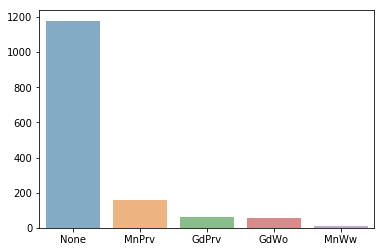

In [0]:
fence_count = train['Fence'].value_counts()
sns.barplot(fence_count.index, fence_count.values, alpha = 0.6)

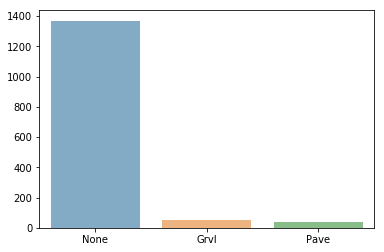

In [0]:
alley_count = train['Alley'].value_counts()
sns.barplot(alley_count.index, alley_count.values, alpha = 0.6)

In [0]:
numTrain['SalePrice'].corr(numTrain['Yeardiff']) #### -0.175183 very small
numTrain['GarageYrBlt'].corr(numTrain['SalePrice']) #### 0.486
numTrain['YearBuilt'].corr(numTrain['SalePrice'])  #### 0.52289

0.5228973328794969

In [0]:
numTrain['GarageYrBlt'].value_counts(dropna=False)

NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
1962.0    21
2009.0    21
1966.0    21
1965.0    21
1958.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1997.0    19
1978.0    19
1960.0    19
1954.0    19
1974.0    18
          ..
1916.0     5
1922.0     5
1936.0     5
1945.0     4
1946.0     4
1982.0     4
1931.0     4
1928.0     4
1935.0     4
1932.0     3
1952.0     3
1921.0     3
1938.0     3
2010.0     3
1910.0     3
1924.0     3
1923.0     3
1947.0     2
1918.0     2
1929.0     2
1914.0     2
1915.0     2
1934.0     2
1937.0     2
1942.0     2
1906.0     1
1927.0     1
1900.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [0]:
train['MiscFeature'].value_counts()

#type(catTrain['MasVnrType'][2])

#type(catTrain)

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

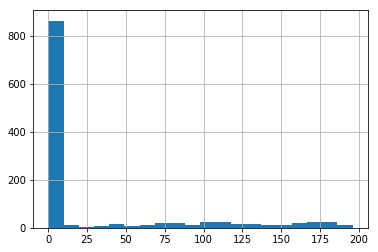

In [0]:
numTrain[numTrain['MasVnrArea'] < 200]['MasVnrArea'].hist(bins=20)

In [13]:
np.count_nonzero(train['PoolArea'])
49/1460

0.03356164383561644

In [12]:
train['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [0]:
train['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
        ... 
129.0      2
313.0      2
118.0      2
122.0      2
121.0      2
101.0      2
109.0      2
115.0      2
116.0      2
114.0      2
153.0      1
149.0      1
150.0      1
111.0      1
182.0      1
46.0       1
112.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [0]:
# Features Selection
# 1. Total number of Bathrooms
# TotBathrooms = FullBath + (HalfBath*0.5) + BsmtFullBath + (BsmtHalfBath*0.5)
# 2. there are 3 variables that are relevant with regards to the Age of a house; YearBlt, YearRemodAdd, and YearSold
# Combinding yearSale - yearRemodAdd, remodel into yes or no, and  to house age. There should be a negative correlation
# 3. Binning Neighborhood - to reduce dimensionality from neighbrohood overdimensionality from dummieing it.
# Seperate into 4 bins which be idea for 0-25%, 26-50%, 51-75%, 75-100%
# You can also do whatever bins you want, suggest less than 5
# 4. Total Square Feet - adding all squarefeet from all levels of housing, thus if house is 4 levels, you add all sf from all floor.
# Should be a direct correlation